In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.qaoa.models.MaxCutProblem import MaxCutProblem

def visualize(data, x,y, hues, chart):
    fig = plt.figure(figsize=(12,9))
    match chart:
        case 'line':
            chart_type = sns.lineplot
        case 'bar':
            chart_type = sns.barplot
        case 'box':
            chart_type = sns.boxplot

    # make a copy to avoid modifying the original DataFrame and avoid warnings
    data_to_plot = data.copy()

    try:
        if len(hues) > 1:
            data_to_plot['hues'] = data_to_plot[hues].astype(str).agg('-'.join, axis=1)
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        elif len(hues) == 1:
            data_to_plot['hues'] = data_to_plot[hues[0]]
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            _ = chart_type(data=data_to_plot, x=x, y=y)
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
            #plt.show()

            plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

        plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
        plt.show()
        plt.close(fig)
    except (KeyError, ValueError) as e:
        print(f"You've passed an incorrect column name.\n The correct ones are: \n{data_to_plot.columns}\nException: {e}")


### Configure the results you want to visualize under.

#### Pick multiple hues with ctrl or shift + click.
#### The "Exclude bad" removes the warm started hamming distances of >0 from the dataset.


In [2]:
import ast
import numpy as np



strings = [
    "results/results_papergraph_qaoa_variant_{'multiangle', 'vanilla'}_depth_{2, 4, 6, 8, 10}.csv",
    "results/results_papergraph_depth_{2, 4, 6, 8, 10}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{2, 4, 6}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{8, 10}_hamming_dist_{2, 4, 6}.csv"
]
strings = ["results/results_statevector_HD135_all.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'{'noisy_sampling'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv"]
for file in strings:
    try:
        df = pd.read_csv(file)
        #print(f"File: {file}")
        #print(df['graph_name'].value_counts())
        #print("\n")
    except FileNotFoundError:
        print(f"File not found: {file}")

if len(strings) >1:
    results = pd.concat([pd.read_csv(path,index_col=0) for path in strings])

else:
    results = pd.read_csv(strings[0])



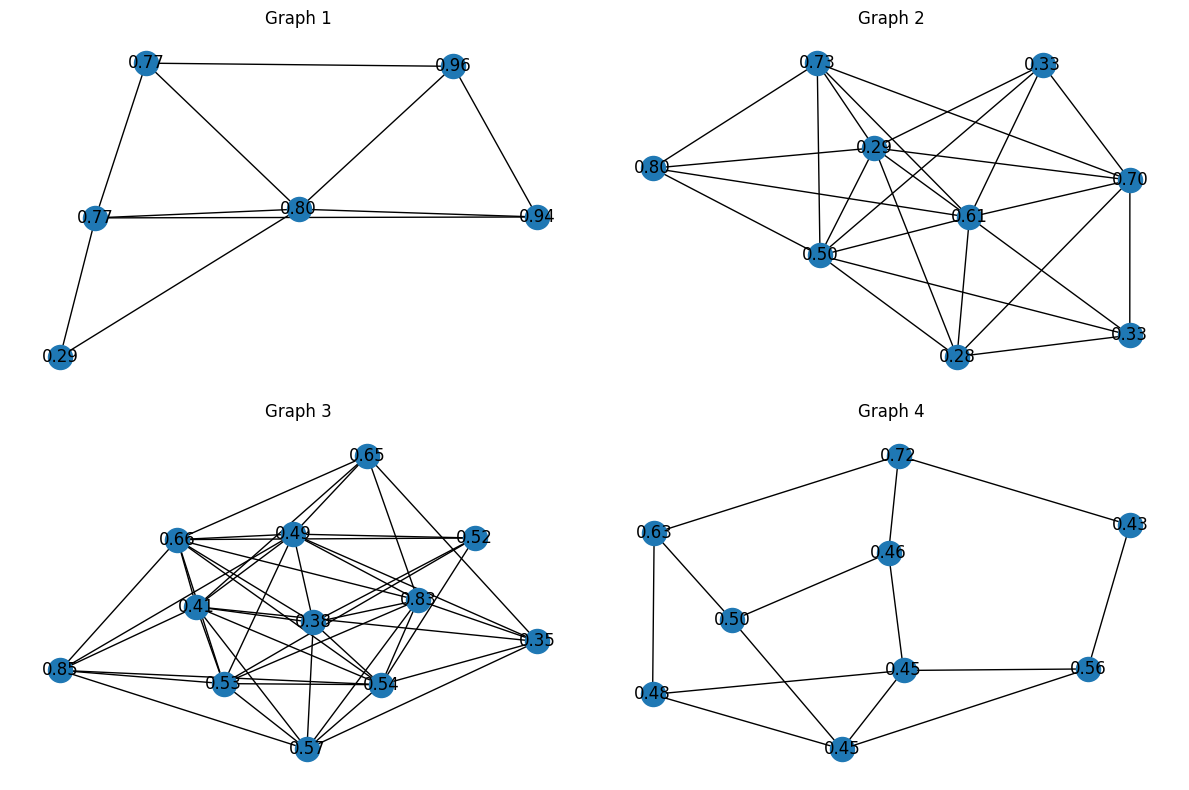

0.7974238714485382
0.7700612176014103
0.956440762925937
0.2947390450335806
0.76789072804424
0.9417981392599122


In [3]:
from rustworkx.visualization import mpl_draw as draw_graph
problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs_paper1()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for idx, graph in enumerate(graphs):
    # Create a mapping from node indices to their values to use as labels
    
    draw_graph(graph, ax=axes[idx], with_labels=True, labels=lambda node: f"{node:.2f}")
    axes[idx].set_title(f"Graph {idx+1}")

plt.tight_layout()
plt.show()
for n in graphs[0].node_indices():
    print(graphs[0][n])


In [4]:
df = pd.read_csv('results/all_results_statevector_HD248_CSWS.csv')

files = [
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1,10},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{1,10},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{4,7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'multiangle'},'param_initialization'{'gaussian'},'depth'{4,7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1,10,4,7},'warm_start'{False,True},'problem_type'{'minvertexcover'}}.csv",
    "results/results_papergraph_{'backend_mode'{'statevector'},'qaoa_variant'{'vanilla'},'param_initialization'{'gaussian'},'depth'{1,10,4,7},'warm_start'{True},'problem_type'{'minvertexcover'},'hamming_dist'{1,3,5}}.csv"
]

dfs = []
for path in files:
    try:
        dfs.append(pd.read_csv(path, index_col=0))
    except FileNotFoundError:
        print(f"File not found: {path}")

df_new = pd.concat(dfs, ignore_index=True)

#df_cleaned = df[df['hamming_dist']==0]
#df_cleaned = df_cleaned[df_cleaned['qaoa_variant']=='vanilla']
#df_new = pd.concat([df_new, df_cleaned],ignore_index=True)
#df_new
print("param_initialization value counts:")
print(df_new['param_initialization'].value_counts())

print("\nqaoa_variant value counts:")
print(df_new['qaoa_variant'].value_counts())

print("\nwarm_start value counts:")
print(df_new['warm_start'].value_counts())

print("\ndepth value counts:")
print(df_new['depth'].value_counts())

multiangle_depth1_count = df_new[(df_new['qaoa_variant'] == 'multiangle') & (df_new['depth'] == 1)].shape[0]
print("Amount of multiangle depth 1:", multiangle_depth1_count)


param_initialization value counts:
param_initialization
gaussian    8000
Name: count, dtype: int64

qaoa_variant value counts:
qaoa_variant
multiangle    4000
vanilla       4000
Name: count, dtype: int64

warm_start value counts:
warm_start
True     6400
False    1600
Name: count, dtype: int64

depth value counts:
depth
1     2000
10    2000
4     2000
7     2000
Name: count, dtype: int64
Amount of multiangle depth 1: 1000


In [5]:
df_new

,graph_size,backend_mode,param_initialization,qaoa_variant,optimizer,warm_start,depth,problem_type,amount_shots,max_tol,...,quantum_solution,quantum_obj_value,classic_solution,classic_value,final_params,percent_measure_optimal,hamming_dist,hamming_string,hamming_obj_func,graph_name
0,6,statevector,gaussian,multiangle,COBYLA,False,1,minvertexcover,5000,1.000000e-08,...,"[1, 0, 0, 1, 1, 1]",2.801852,"[1.0, 1.0, 1.0, 0, 0, 0]",2.523926,[3.9269908 3.92699081 5.49778714 3.92699083 2...,5.000000e-01,0,NaN,NaN,>>graph6<<Emz_
1,9,statevector,gaussian,multiangle,COBYLA,False,1,minvertexcover,5000,1.000000e-08,...,"[1, 1, 1, 1, 1, 1, 0, 0, 1]",3.561392,"[1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0]",3.071701,[3.92712384 2.35625545 3.9268623 2.35576387 4...,0.000000e+00,0,NaN,NaN,>>graph6<<HmzffJz
2,9,statevector,gaussian,multiangle,COBYLA,False,1,minvertexcover,5000,1.000000e-08,...,"[1, 0, 0, 1, 1, 1, 0, 1, 1]",3.012354,"[1.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0]",2.422418,[3.92699082 2.35619437 2.35619444 3.92699085 3...,4.130173e-34,0,NaN,NaN,>>graph6<<Hh_iS_u
3,6,statevector,gaussian,multiangle,COBYLA,True,1,minvertexcover,5000,1.000000e-08,...,"[1, 1, 1, 0, 0, 0]",2.523926,"[1.0, 1.0, 1.0, 0, 0, 0]",2.523926,[4.71189462 4.71220705 1.57024382 4.39523505 4...,7.335800e-01,0,[1 1 1 0 0 0],2.523926,>>graph6<<Emz_
4,9,statevector,gaussian,multiangle,COBYLA,True,1,minvertexcover,5000,1.000000e-08,...,"[1, 1, 0, 0, 1, 1, 1, 1, 1]",3.071701,"[1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0]",3.071701,[4.7068874 1.59299345 4.73968203 4.67291942 4...,0.000000e+00,0,[1 1 0 0 1 1 1 1 1],3.071701,>>graph6<<HmzffJz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,12,statevector,gaussian,vanilla,COBYLA,True,10,minvertexcover,5000,1.000000e-08,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",6.772683,"[1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",4.572071,[4.08194638 1.52554822 3.14010289 1.58882134 2...,4.970528e-05,3,[1 1 1 1 1 1 1 0 1 1 1 0],5.604955,>>graph6<<KmzffJznl{hU
7996,9,statevector,gaussian,vanilla,COBYLA,True,10,minvertexcover,5000,1.000000e-08,...,"[1, 1, 1, 1, 0, 1, 1, 1, 1]",4.046085,"[1.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0]",2.422418,[4.17698689 1.6411558 2.81139467 1.45389366 3...,2.188545e-03,3,[1 1 1 1 1 0 1 1 1],4.202585,>>graph6<<Hh_iS_u
7997,9,statevector,gaussian,vanilla,COBYLA,True,10,minvertexcover,5000,1.000000e-08,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",4.571084,"[1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0]",3.071701,[4.29911523 1.52156394 3.1266019 1.56208259 2...,0.000000e+00,5,[1 1 1 1 0 0 0 1 1],3.177470,>>graph6<<HmzffJz
7998,12,statevector,gaussian,vanilla,COBYLA,True,10,minvertexcover,5000,1.000000e-08,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]",5.678444,"[1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",4.572071,[3.45490398 1.48608807 3.16209768 1.47455439 3...,5.365107e-03,5,[1 1 1 1 1 1 1 0 1 1 0 1],5.551709,>>graph6<<KmzffJznl{hU


In [6]:
from src.qaoa.models.solver import MinVertexCoverSolver
import networkx as nx

print(results['graph_name'].value_counts())

for g in graphs:
    # create a networkx graph from the rustworkx graph
    G = nx.Graph(list(g.edge_list()))
    graph6_string = nx.to_graph6_bytes(G).decode("utf-8").strip()
    solver = MinVertexCoverSolver(g, 'minvertexcover')
    mask = results['graph_name'] == graph6_string
    results.loc[results['graph_name'] == graph6_string, 'infeasible']= results.loc[mask, 'quantum_solution'].apply(lambda s: solver.evaluate_bitstring(ast.literal_eval(s),mark_infeasible=True)[1])
    mask_ws = (results['graph_name'] == graph6_string) & (results['warm_start'] == True)
    results.loc[mask_ws, 'ws_value'] = results.loc[mask_ws, 'hamming_string'].apply(
        lambda s: solver.evaluate_bitstring(ast.literal_eval(s.replace(" ",",")), mark_infeasible=True)[0]
    )




"""for index, row in results[mask].iterrows():
    if index == 0:
        continue
    row['infeasible'] = solver.evaluate_bitstring(ast.literal_eval(row['quantum_solution']), mark_infeasible=True)[1]
    results.iloc[index] = row
"""
print(results.groupby('graph_name')['infeasible'].value_counts())
results = results[results['infeasible'] ==False]


graph_name
>>graph6<<Emz_            2250
>>graph6<<HmzffJz         2250
>>graph6<<Hh_iS_u         2250
>>graph6<<KmzffJznl{hU    2250
Name: count, dtype: int64
graph_name              infeasible
>>graph6<<Emz_          False         2141
                        True           109
>>graph6<<Hh_iS_u       False         2203
                        True            47
>>graph6<<HmzffJz       False         1901
                        True           349
>>graph6<<KmzffJznl{hU  False         1930
                        True           320
Name: count, dtype: int64


In [7]:
from ipywidgets import interact, interactive_output, widgets, HBox, VBox
import matplotlib.pyplot as plt
import ast, pandas as pd

# --- basic controls ----------------------------------------------------------
graph_names = ['All'] + results['graph_name'].unique().tolist()
y_options   = ['ratio', 'time_elapsed', 'quantum_func_evals', 'percent_measure_optimal']
x_options   = ['qaoa_variant', 'depth', 'hamming_dist', 'warm_start',
               'lagrangian_multiplier','backend_mode']
hue_options = x_options.copy()
chart_types = ['bar', 'line', 'box']
ws_options  = [False, True]

graph_dd   = widgets.Dropdown(options=graph_names,  description='Graph:')
x_dd       = widgets.Dropdown(options=x_options,     description='X axis:')
y_dd       = widgets.Dropdown(options=y_options,     description='Y axis:')
hues_ms    = widgets.SelectMultiple(options=hue_options, description='Hues:')
chart_dd   = widgets.Dropdown(options=chart_types,   description='Chart:')
ws_dd      = widgets.Dropdown(options=ws_options,    description='Exclude WS?')

# --- helper to build one "filter row" ----------------------------------------
all_cols   = results.columns.tolist()
ops        = ['>', '>=', '<', '<=', '==', '!=']

def make_filter_row(i: int):
    """Return widgets for a single filter row."""
    enable   = widgets.Checkbox(value=False, description=f'Filter {i}')
    col      = widgets.Dropdown(options=all_cols, description='Column')
    op       = widgets.Dropdown(options=ops,      description='Op')
    val      = widgets.Text(description='Value')
    return enable, col, op, val

flt1_enable, flt1_col, flt1_op, flt1_val = make_filter_row(1)
flt2_enable, flt2_col, flt2_op, flt2_val = make_filter_row(2)

filter_box = VBox([
    HBox([flt1_enable, flt1_col, flt1_op, flt1_val]),
    HBox([flt2_enable, flt2_col, flt2_op, flt2_val])
])

# --- function that actually draws -------------------------------------------
def _apply_single_filter(df, enable, col, op, val):
    """Apply one filter if `enable` is True."""
    if not enable:
        return df                     # nothing to do
    if col not in df.columns:
        return df                     # silent fail-safe
    try:                              # try to coerce the value to column dtype
        val = df[col].dtype.type(val)
    except Exception:
        pass
    expr = f"`{col}` {op} @val"            # back-ticks are harmless even if not needed
    return df.query(expr)


def update_visualization(graph_name, x, y, hues, chart,
                         exclude_warmstart,
                         # filter-1 widgets
                         f1_en, f1_col, f1_op, f1_val,
                         # filter-2 widgets
                         f2_en, f2_col, f2_op, f2_val):
    
    # --- start with the selected graph(s) ------------------------------------
    if graph_name == 'All':

        df = results.copy() 
    else:
        df = results[results['graph_name'] == graph_name].copy()
    
    # --- built-in warm-start exclusion ---------------------------------------
    if exclude_warmstart:
        df = df[df['hamming_dist'] == 0]
    
    # --- apply the two optional filters --------------------------------------
    df = _apply_single_filter(df, f1_en, f1_col, f1_op, f1_val)
    df = _apply_single_filter(df, f2_en, f2_col, f2_op, f2_val)
    
    # --- tidy + call your plotting helper ------------------------------------
    if hues:
        df = df.sort_values(by=[x] + list(hues))
    visualize(df, x=x, y=y, hues=list(hues), chart=chart)

# --- wire everything up ------------------------------------------------------
ui = VBox([
    HBox([graph_dd, x_dd, y_dd]),
    HBox([hues_ms, chart_dd, ws_dd]),
    filter_box
])

out = interactive_output(
    update_visualization,
    {
        'graph_name': graph_dd, 'x': x_dd, 'y': y_dd, 'hues': hues_ms,
        'chart': chart_dd, 'exclude_warmstart': ws_dd,
        
        # pipe the widgets for the two filters
        'f1_en': flt1_enable, 'f1_col': flt1_col, 'f1_op': flt1_op, 'f1_val': flt1_val,
        'f2_en': flt2_enable, 'f2_col': flt2_col, 'f2_op': flt2_op, 'f2_val': flt2_val
    }
)

display(ui, out)


Output()

In [9]:
results['improvement'] = results['quantum_obj_value'] - results['hamming_obj_func']
#results[results['ws_value'] < results['quantum_obj_value']][['quantum_obj_value', 'ws_value']]
#print(results[results['ws_value'] < results['quantum_obj_value']][['quantum_obj_value', 'ws_value']])
print("Improvement column info:")
print(results['improvement'].describe())

Improvement column info:
count    6631.000000
mean       -0.028057
std         0.750853
min        -2.200612
25%        -0.477950
50%         0.000000
75%         0.277926
max         2.258117
Name: improvement, dtype: float64
